In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

import os
import warnings        
warnings.filterwarnings("ignore") 
plt.style.use('ggplot')

In [35]:
df =pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")
df.set_index("Ngay", inplace=True)

In [36]:
df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Ngay,,,,,,,,,,,,,,,,,,,,,
01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [37]:
feats= ['12','13','14']

In [38]:

data = df[feats]
data

,12,13,14
Ngay,,,
01/01/2021,964.4,964.4,964.4
01/02/2021,1019.7,1019.7,1019.7
01/03/2021,988.4,988.4,988.4
01/04/2021,1010.8,1010.8,1010.8
01/05/2021,1061.5,1061.5,1061.5
...,...,...,...
27/12/2021,1002.0,1002.0,1002.1
28/12/2021,1002.0,1002.0,1002.0
29/12/2021,1061.5,1061.5,1061.5


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2021 to 31/12/2021
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   12      365 non-null    float64
 1   13      365 non-null    float64
 2   14      365 non-null    float64
dtypes: float64(3)
memory usage: 11.4+ KB


In [40]:
data.isnull().sum()

12    0
13    0
14    0
dtype: int64

# xác định số tầng ẩn

In [41]:
from hmmlearn.hmm import GaussianHMM

aic_values = []
# Thử nghiệm với các giá trị số lượng trạng thái ẩn từ 1 đến 10
for n_components in range(1, 11):
    # Khởi tạo và huấn luyện mô hình HMM
    model = GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
    model.fit(data)

    # Tính toán AIC cho mô hình
    aic = model.aic(data)
    aic_values.append(aic)

    print(f"Number of components: {n_components}, AIC: {aic}")

# Chọn số lượng trạng thái ẩn có AIC thấp nhất
best_n_components = np.argmin(aic_values) + 1
print(f"Best number of components: {best_n_components}")

Number of components: 1, AIC: 13311.698686620359
Number of components: 2, AIC: 11599.018388802724
Number of components: 3, AIC: 9597.204756823314
Number of components: 4, AIC: 9133.452771288426
Number of components: 5, AIC: 9991.62139422301
Number of components: 6, AIC: 6814.395363642802
Number of components: 7, AIC: 8606.427183464637
Number of components: 8, AIC: 8056.647141265751
Number of components: 9, AIC: 4740.1487645584975
Number of components: 10, AIC: 5667.643938885718
Best number of components: 9


In [42]:
# Khởi tạo và huấn luyện mô hình HMM
model = GaussianHMM(n_components=best_n_components, covariance_type="diag", n_iter=1000)
model.fit(data)

# Dự đoán trạng thái ẩn cho dữ liệu
hidden_states = model.predict(data)

# In ra trạng thái ẩn dự đoán
print("Hidden States:")
print(hidden_states)


Hidden States:
[7 6 6 6 3 3 3 3 3 7 6 3 3 3 3 3 6 3 3 3 3 3 6 6 6 6 7 7 8 2 7 7 7 7 7 7 7
 7 7 2 2 2 2 2 2 2 7 7 7 7 7 7 6 6 6 6 6 6 7 6 6 6 6 6 6 7 6 6 6 3 6 6 6 6
 3 3 3 3 3 7 6 6 6 3 3 3 7 6 3 6 6 6 6 7 6 3 3 3 6 7 7 7 3 3 3 3 3 6 3 3 3
 3 3 3 7 3 3 3 3 8 2 7 3 3 3 6 6 6 7 6 3 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3
 6 6 3 6 6 6 6 7 7 6 3 3 3 3 6 6 6 7 6 6 3 3 6 7 6 6 3 3 3 7 7 7 6 8 7 7 7
 6 3 7 6 6 6 7 7 6 6 3 3 3 7 0 1 4 1 4 1 0 1 5 5 3 6 7 8 6 3 3 3 3 3 6 0 1
 1 1 1 1 1 4 4 1 1 1 5 3 3 5 5 3 3 6 8 6 6 6 8 6 3 6 3 3 3 3 5 3 7 3 3 6 6
 6 6 8 6 6 6 6 6 7 8 7 6 6 6 6 6 8 6 6 7 6 3 6 7 6 3 3 3 6 6 7 6 3 3 3 3 6
 7 6 6 6 6 6 6 8 6 3 6 6 6 6 7 6 6 3 3 3 6 7 3 3 3 3 3 3 7 6 3 6 6 6 7 7 7
 6 6 6 6 6 7 6 6 6 3 3 6 7 6 3 3 3 3 6 6 3 3 6 6 6 6 7 6 6 3 6 6]


Text(0.5, 1.0, 'Original Data')

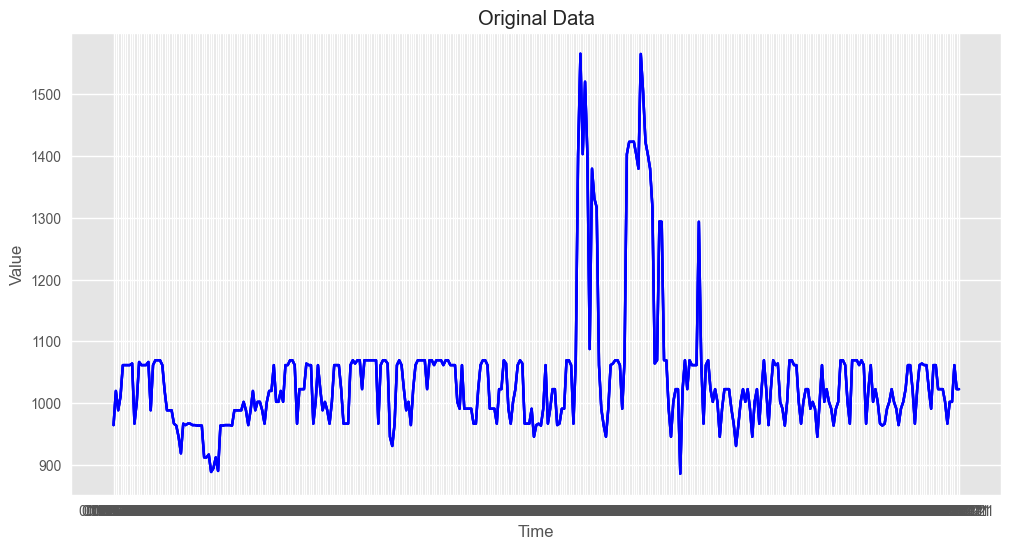

In [43]:
# Vẽ biểu đồ dữ liệu gốc
plt.figure(figsize=(12, 6))
plt.plot(data, color='blue', label='Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data')

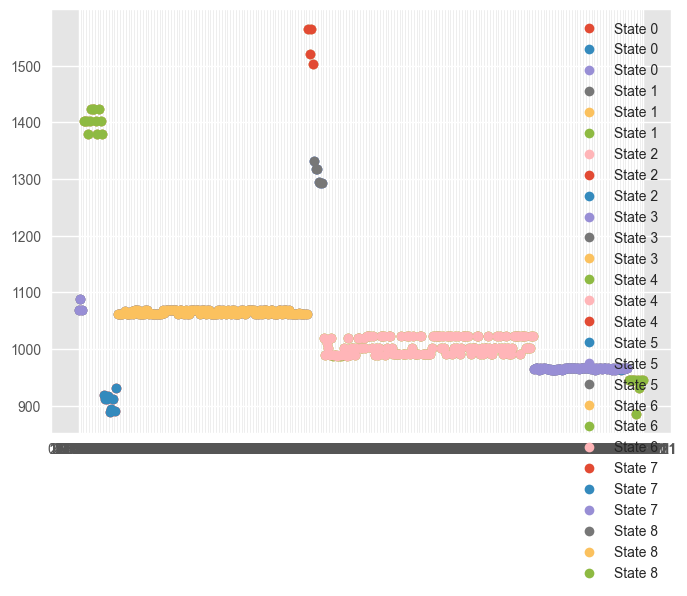

In [44]:
for state in range(best_n_components):
    state_data = data[hidden_states == state]
    plt.plot(state_data, label=f'State {state}', linestyle='None', marker='o')
plt.legend()

plt.show()

# Makov Chain

In [45]:
from scipy import stats
class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
        
    def probs(self): 
        return self.probability_distribution
    
    def vals(self): 
        print(self.type)
        return self.values 

In [46]:
values = ['S', 'C']
probabilities = [0.5, 0.5]
weather = Random_Variable('weather', values, probabilities)
samples = weather.sample(365)

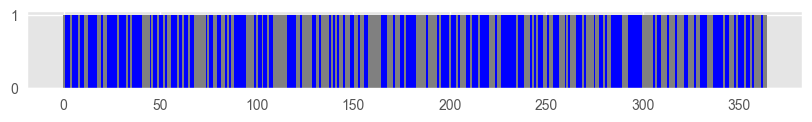

In [47]:
state2color = {} 
state2color['S'] = 'blue'
state2color['C'] = 'grey'

def plot_weather_samples(samples, state2color): 
    colors = [state2color[x] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    
plot_weather_samples(samples, state2color)

In [48]:
def markov_chain(transmat, state, state_names, samples): 
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))
    
    # create random variables for each row of transition matrix 
    for r in range(rows): 
        rv = Random_Variable("row" + str(r), values, transmat[r])
        rvs.append(rv)
    
    # start from initial state and then sample the appropriate 
    # random variable based on the state following the transitions 
    states = [] 
    for n in range(samples): 
        state = rvs[state].sample(1)[0]    
        states.append(state_names[state])
    return states


In [49]:

# transition matrices for the Markov Chain 
transmat1 = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

transmat2 = np.array([[0.9, 0.1], 
                    [0.1, 0.9]])

transmat3 = np.array([[0.5, 0.5], 
                     [0.5, 0.5]])



TypeError: 'NoneType' object is not subscriptable

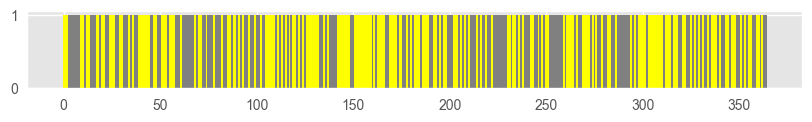

In [53]:
# plot the iid model too

state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'
samples = weather.sample(365)

plot_weather_samples(samples, state2color)

samples1 = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(samples1, state2color)

# samples2 = markov_chain(transmat2,0,['S','C'], 365)
# plot_weather_samples(samples2, state2color)

# samples3 = markov_chain(transmat3,0,['S','C'], 365)
# plot_weather_samples(samples3, state2color)

In [ ]:
state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

samples = weather.sample(365)
states = markov_chain(transmat2,0,['S','C'], 365)
plot_weather_samples(states, state2color)

sunny_colors = Random_Variable('sunny_colors', ['y', 'r', 'b', 'g'], 
                              [0.4, 0.4, 0.1, 0.1])
cloudy_colors = Random_Variable('cloudy_colors', ['y', 'r', 'b', 'g'], 
                               [0.1, 0.1, 0.6, 0.2])

def emit_sample(state, sunny_colors, cloudy_colors): 
    if (state == 'S'): 
        sample = sunny_colors.sample(1)[0]
    else: 
        sample = cloudy_colors.sample(1)[0]
    return sample 

samples = [emit_sample(s, sunny_colors, cloudy_colors) for s in states]
state2color = {} 
state2color['y'] = 'yellow'
state2color['r'] = 'red'
state2color['b'] = 'blue'
state2color['g'] = 'grey'
plot_weather_samples(samples, state2color)

TypeError: 'NoneType' object is not subscriptable

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


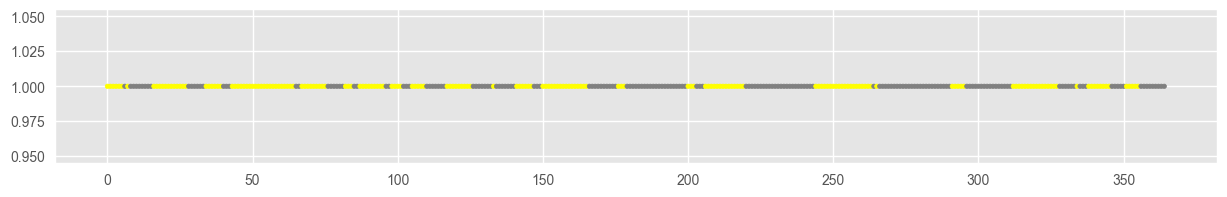

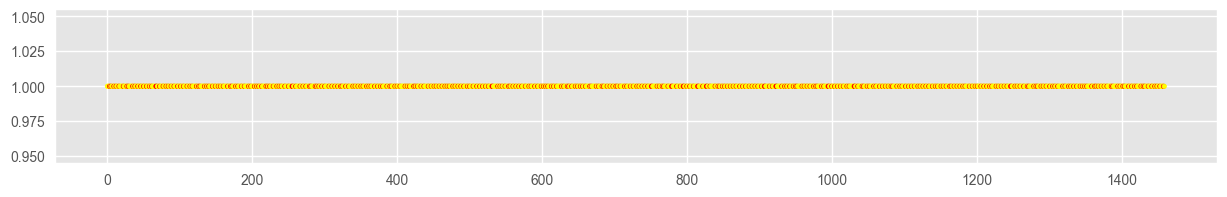

In [ ]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Transition matrix for 2 states
transmat = np.array([[0.9, 0.1], 
                     [0.1, 0.9]])

# Start probabilities for 2 states
start_prob = np.array([1.0, 0.0])

# Emission probabilities
# Yellow and red have high probs for sunny 
# Blue and grey have high probs for cloudy 
emission_probs = np.array([[0.4, 0.4, 0.1, 0.1], 
                           [0.1, 0.1, 0.6, 0.2]])

# Create the HMM model with 2 states
model = hmm.MultinomialHMM(n_components=2, n_trials=1)  # Set n_trials here
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

# Sample the model - X is the observed values and Z is the "hidden" states 
X, Z = model.sample(365)

# Define state to color mapping for plotting
state2color = {0: 'yellow', 1: 'grey'}

# Function to plot weather samples
def plot_weather_samples(states, state2color):
    colors = [state2color[state] for state in states]
    plt.figure(figsize=(15, 2))
    plt.scatter(range(len(states)), [1] * len(states), c=colors, s=10)
    plt.show()

plot_weather_samples(Z, state2color)

# Flatten the samples
samples = [item for sublist in X for item in sublist]

# Update the state2color mapping for the observed values
state2color = {0: 'yellow', 1: 'red', 2: 'blue', 3: 'grey'}

plot_weather_samples(samples, state2color)